<center>
<img src="../../img/ods_stickers.jpg" />
    
## [mlcourse.ai](https://mlcourse.ai) – Open Machine Learning Course 

Authors: Vadim Shestopalov (@vchulski), Valentina Biryukova (@myltykritik), and Yury Kashnitsky (@yorko). This material is subject to the terms and conditions of the [Creative Commons CC BY-NC-SA 4.0](https://creativecommons.org/licenses/by-nc-sa/4.0/) license. Free use is permitted for any non-commercial purpose.

# <center> Fall 2019. Quiz 3. Unsupervised learning & time series

Prior to working on this quiz, you'd better check out the corresponding course material:
 - [Unsupervised learning: PCA and clustering](https://mlcourse.ai/articles/topic7-unsupervised/), the same as an interactive web-based [Kaggle Kernel](https://www.kaggle.com/kashnitsky/topic-7-unsupervised-learning-pca-and-clustering)
 - [Time series analysis with Python](https://nbviewer.jupyter.org/github/Yorko/mlcourse_open/blob/master/jupyter_english/topic09_time_series/topic9_part1_time_series_python.ipynb?flush_cache=true), the same as an interactive web-based [Kaggle Kernel](https://www.kaggle.com/kashnitsky/topic-9-part-1-time-series-analysis-in-python)
 - [Predicting future with Facebook Prophet](https://nbviewer.jupyter.org/github/Yorko/mlcourse_open/blob/master/jupyter_english/topic09_time_series/topic9_part2_facebook_prophet.ipynb?flush_cache=true), the same as a [Kaggle Kernel](https://www.kaggle.com/kashnitsky/topic-9-part-2-time-series-with-facebook-prophet)
 
Also, checkout corresponding mlcourse.ai [video lectures](https://mlcourse.ai/lectures)

### Your task is to:
 1. study the materials 
 1. write code where needed
 1. choose answers in the [webform](https://docs.google.com/forms/d/11bOOegz0U3pATEOhBH6ZV1m7sLOAcc-n0C9WjJygEQE)
 
Solutions are discussed during a [live YouTube session](https://youtu.be/xVnCdzGrOfk) on November 16.   You can get up to 10 credits (those points in a web-form, 15 max, will be scaled to a max of 10 credits). 
 
### <center> Deadline for Quiz 3: 2019 November 15, 20:59 GMT (London time)

## Part 1. Unsupervised learning

*For discussions, please stick to [ODS Slack](https://opendatascience.slack.com/), channel __#mlcourse_ai_news__, pinned thread __#quiz3\_part1\_fall2019__*. TA for this part is Yury **@yorko**.

**Question 1.** Using the face recognition dataset downloaded with the code below choose the best number of `n_components` to achieve best accuracy on holdout set (holdout part should be 30% of the training set) using SVM model for classification (`SVC`) with the following params: `gamma=0.01` and `class_weight='balanced'` <br> Note: Use random seed equal to `17` everywhere (`train_test_split`, `PCA` and `SVC`). Also, specify `whiten=True` for PCA, this will normalize variances of PCA components and will positively affect classification just like in case of using `StandardScaler`.   

<br> What number of PCA components maximizes holdout accuracy of the SVM model?

 1. 50
 1. 100 **<--**
 1. 150
 1. 200

In [6]:
import numpy as np
import pandas as pd
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.datasets import fetch_lfw_people
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from matplotlib import pyplot as plt

In [7]:
# Download the data and load it as numpy arrays
lfw_people = fetch_lfw_people(data_home='../../data/faces/',
                              min_faces_per_person=70, resize=0.4)

X = lfw_people.data
n_features = X.shape[1]

# the label to predict is the id of the person
y = lfw_people.target
target_names = lfw_people.target_names
n_classes = target_names.shape[0]

print("Total dataset size:")
print("n_features: %d" % n_features)
print("n_classes: %d" % n_classes)

Total dataset size:
n_features: 1850
n_classes: 7


In [8]:
for i, count in enumerate(np.bincount(y)):
    print(f'{count} photos of {target_names[i]}' )

77 photos of Ariel Sharon
236 photos of Colin Powell
121 photos of Donald Rumsfeld
530 photos of George W Bush
109 photos of Gerhard Schroeder
71 photos of Hugo Chavez
144 photos of Tony Blair


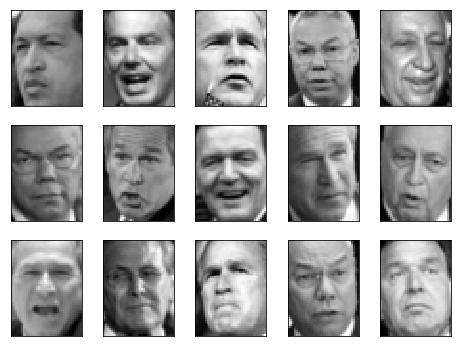

In [9]:
fig = plt.figure(figsize=(8, 6))

for i in range(15):
    ax = fig.add_subplot(3, 5, i + 1, xticks=[], yticks=[])
    ax.imshow(lfw_people.images[i], cmap='gray')

In [10]:
X.shape

(1288, 1850)

In [11]:
len(y)

1288

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=17)

In [13]:
for i in [50, 100, 150, 200]:
    pca = PCA(n_components=i, whiten=True)
    pca.fit(X_train)
    X_train_pca = pca.transform(X_train)
    X_test_pca = pca.transform(X_test)
    svc = SVC(gamma=0.01, class_weight='balanced')
    svc.fit(X_train_pca, y_train)
    preds = svc.predict(X_test_pca)
    print(f'num comp: {i}; accuracy score: {accuracy_score(preds, y_test)}')

num comp: 50; accuracy score: 0.7984496124031008
num comp: 100; accuracy score: 0.834625322997416
num comp: 150; accuracy score: 0.7209302325581395
num comp: 200; accuracy score: 0.5633074935400517


**Question 2**. Choose the correct option. In K-means algorithm at each iteration: 
 1. Centroid of the cluster is moved in a random direction to increase robustness of the solution
 1. Each instance is attributed to a closest centroid **<--**
 1. K is increased by 1
 1. All of the above

**Question 3**. Select all correct statements about agglomerative clustering

1. At each step, two random instances are merges to form a cluster
1. The algorithm terminates when all instances are merged into one cluster  **YES**
1. The ultimate number of iterations of the algorithm is $n$, where $n$ is the number of instances in the data set
1. Output of the algorithm depends on the way to define distance between clusters, i.e. *linkage*  **YES**

**Question 4.** For which of the following clustering algorithms shall one specify the number of clusters beforehand?
 1. Agglomerative clustering  **YES**
 1. K-means  **YES**
 1. Affinity Propagation  **NO**
 1. All of the above

**Question 5.** Which of the following metrics, assessing clustering quality, can be calculated without knowing true cluster labels?
 1. Adjusted Mutual Information (AMI) **NO**
 1. Silhouette  **YES**
 1. Completeness  **NO**
 1. None of the above

## Part 2. Time series

*For discussions, please stick to [ODS Slack](https://opendatascience.slack.com/), channel __#mlcourse_ai_news__, pinned thread __#quiz3\_part2\_fall2019__*. TA for this part is Valentina **@myltykritik**.

**Question 6.** Which of the following is an example of time series? Select all correct options.
1. Daily temperature in Moscow for 20 years  **YES**
1. Texts of news from Times site  **NO**
1. Pigeon population in different Russian cities in 2019
1. GPS-coordinates of someone's trajectory  **YES** https://www.microsoft.com/en-us/research/project/trajectory-data-mining/

**Question 7.** Which of these are possible components of a time series?
1. Trend
1. Seasonality
1. Noise
1. Cyclical
1. All of the above  **<--**

**Question 8.** Sales of some products in July were 200, in August - 600, in September - 500, in October - 100. What is the 3 month Moving Average forecast for November?
1. 200
1. 300
1. 400 **<--**
1. 500

In [14]:
(600+500+100)/3

400.0

**Question 9.**
You have some stock (S&P) data [from here](https://www.kaggle.com/camnugent/sandp500/download) for five years until February 2018 and want to make prediction model for Facebook stocks. You need `FB_data.csv` file - it's committed to the course repo as well. 

1. Split the data into training and test sets. Everything before 01.09.2017 (`pd.datetime(2017, 9, 1)`) would form a training set. The rest would be a test set.
2. Train the `Prophet()` model with default parameters
3. Measure MAPE (mean average percentage error) for the test set

What test set MAPE do you get (approx.)?

1. 2.5% **<--**
1. 3.5%
1. 4.5%
1. 5.5%

In [15]:
from fbprophet import Prophet
import logging
logging.getLogger().setLevel(logging.ERROR)

In [16]:
!pip list | grep prophet

fbprophet                          0.5                     


In [17]:
#!pip install --user --upgrade fbprophet

In [18]:
df = pd.read_csv('../../data/FB_data.csv')
df = df[['date', 'close']].reset_index(drop=True)
df = df.rename({'close':'y', 'date':'ds'}, axis='columns')
df['ds'] = pd.to_datetime(df['ds'])

In [19]:
df.head()

,ds,y
0,2013-02-08,28.5450
1,2013-02-11,28.2600
2,2013-02-12,27.3700
3,2013-02-13,27.9075
4,2013-02-14,28.5000


In [20]:
X_train = df[df.ds < pd.datetime(2017, 9, 1)]
X_test = df[df.ds >= pd.datetime(2017, 9, 1)]

In [21]:
X_train.describe(include='all')

,ds,y
count,1150,1150.000000
unique,1150,NaN
top,2016-09-08 00:00:00,NaN
freq,1,NaN
first,2013-02-08 00:00:00,NaN
last,2017-08-31 00:00:00,NaN
mean,NaN,88.787566
std,NaN,37.591579
min,NaN,22.899000
25%,NaN,62.432500


In [22]:
m = Prophet()
m.fit(X_train)

In [48]:
#future = m.make_future_dataframe(periods=len(X_test))
#future.tail(n=3)

future = df[['ds']]

In [49]:
forecast = m.predict(future)

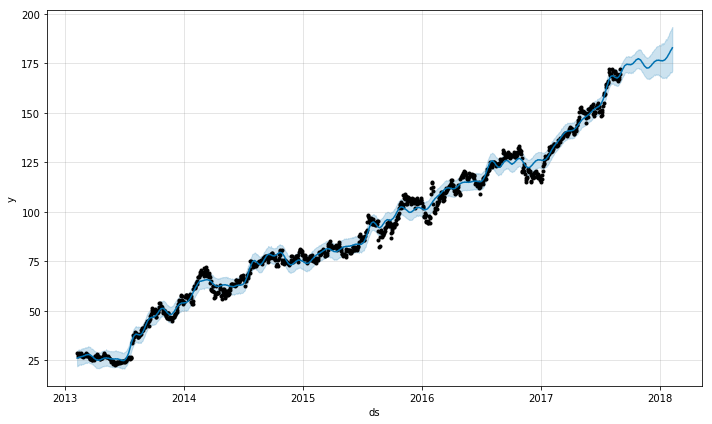

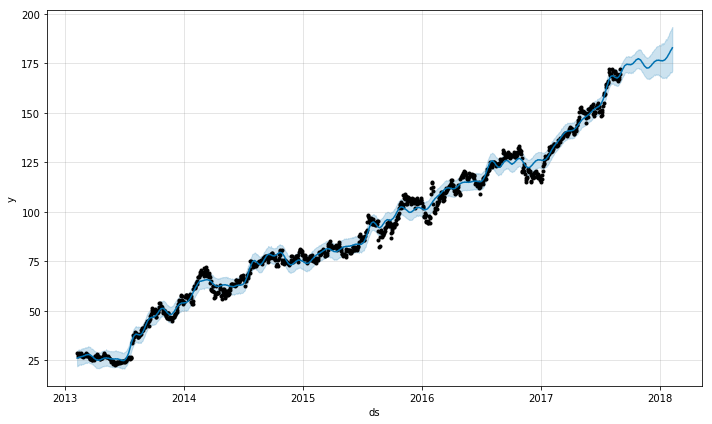

In [50]:
m.plot(forecast)

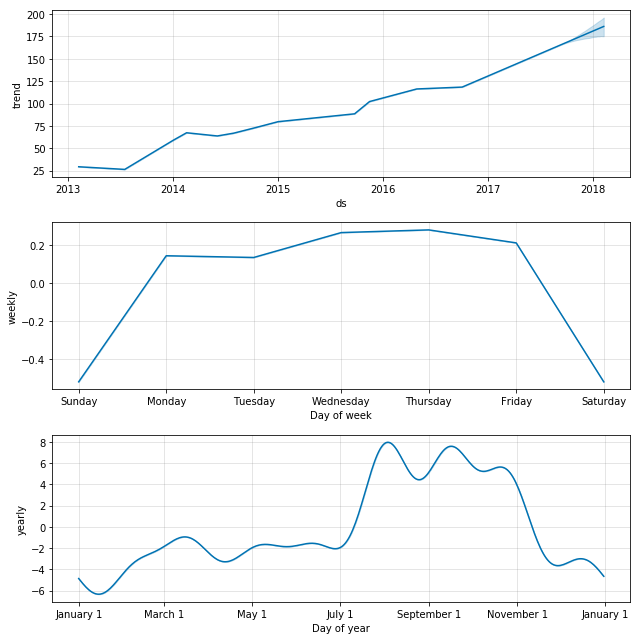

In [51]:
m.plot_components(forecast);

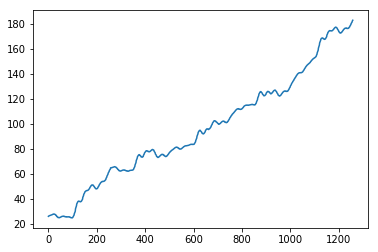

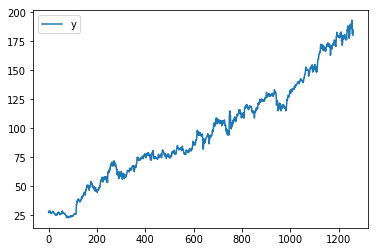

In [52]:
forecast.yhat.plot()
df[['y']].plot()

In [53]:
def calculate_forecast_errors(df, prediction_size):
    """Calculate MAPE and MAE of the forecast.
    
       Args:
           df: joined dataset with 'y' and 'yhat' columns.
           prediction_size: number of days at the end to predict.
    """
    
    # Make a copy
    df = df.copy()
    
    # Now we calculate the values of e_i and p_i according to the formulas given in the article above.
    df['e'] = df['y'] - df['yhat']
    df['p'] = 100 * df['e'] / df['y']
    
    # Recall that we held out the values of the last `prediction_size` days
    # in order to predict them and measure the quality of the model. 
    
    # Now cut out the part of the data which we made our prediction for.
    predicted_part = df[-prediction_size:]
    
    # Define the function that averages absolute error values over the predicted part.
    error_mean = lambda error_name: np.mean(np.abs(predicted_part[error_name]))
    
    # Now we can calculate MAPE and MAE and return the resulting dictionary of errors.
    return {'MAPE': error_mean('p'), 'MAE': error_mean('e')}

In [54]:
def make_comparison_dataframe(historical, forecast):
    """Join the history with the forecast.
    
       The resulting dataset will contain columns 'yhat', 'yhat_lower', 'yhat_upper' and 'y'.
    """
    return forecast.set_index('ds')[['yhat', 'yhat_lower', 'yhat_upper']].join(historical.set_index('ds'))

In [55]:
cmp_df = make_comparison_dataframe(df, forecast)
cmp_df.tail(n=3)

,yhat,yhat_lower,yhat_upper,y
ds,,,,
2018-02-05,182.258852,170.538925,192.906147,181.26
2018-02-06,182.521286,170.826353,192.924530,185.31
2018-02-07,182.916250,171.540991,193.427056,180.18


In [57]:
calculate_forecast_errors(forecast, len(len(X_test)))

TypeError: object of type 'int' has no len()

In [58]:
for err_name, err_value in calculate_forecast_errors(cmp_df, len(X_test)).items():
    print(err_name, err_value)

MAPE 2.454142503900618
MAE 4.403079640677075


In [59]:
forecast[forecast.ds >= pd.datetime(2017, 9, 1)][['ds', 'yhat']]

,ds,yhat
1150,2017-09-01,169.694976
1151,2017-09-05,171.025039
1152,2017-09-06,171.516241
1153,2017-09-07,171.884443
1154,2017-09-08,172.159868
1155,2017-09-11,173.026456
1156,2017-09-12,173.285778
1157,2017-09-13,173.660105
1158,2017-09-14,173.890063
1159,2017-09-15,174.009137


In [60]:
X_test

,ds,y
1150,2017-09-01,172.02
1151,2017-09-05,170.72
1152,2017-09-06,172.09
1153,2017-09-07,173.21
1154,2017-09-08,170.95
1155,2017-09-11,173.51
1156,2017-09-12,172.96
1157,2017-09-13,173.05
1158,2017-09-14,170.96
1159,2017-09-15,171.64


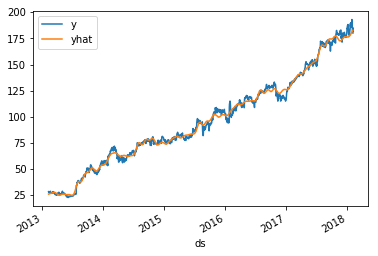

In [64]:
cmp_df[['y','yhat']].plot()

In [66]:
train_df.head()

,ds,y
0,2013-02-08,28.5450
1,2013-02-11,28.2600
2,2013-02-12,27.3700
3,2013-02-13,27.9075
4,2013-02-14,28.5000


In [62]:
prediction_size = 30
train_df = df[:-prediction_size]
train_df.tail(n=3)

,ds,y
1226,2017-12-20,177.89
1227,2017-12-21,177.45
1228,2017-12-22,177.20


In [67]:
m = Prophet()
m.fit(train_df);

In [70]:
future = m.make_future_dataframe(periods=prediction_size)
future.tail(n=3)

,ds
1256,2018-01-19
1257,2018-01-20
1258,2018-01-21


In [71]:
forecast = m.predict(future)
forecast.tail(n=3)

ValueError: Length of passed values is 1259, index implies 26

**Question 10.** What steps should we perform when doing cross-validation for time series? Select all correct answers.

1. Sort your data by time to emphasize time pattern  **YES**
1. No way! Shuffle all the data well, so model will not leak on random patterns!
1. Make several folds, so in validation will be all data from initial series ↓ [image credit](https://towardsdatascience.com/cross-validation-explained-evaluating-estimator-performance-e51e5430ff85)
    <img src="../../img/kfold.png" width=400>
1. No way! Perform method, known as "cross-validation on a rolling basis".  **YES**
    <img src="../../img/time_series_cv.png" width="400">